# Predicting customer churn

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('../Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [28]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data analysis and preperation

In [29]:
# Target variable encoding

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [30]:
# Get overall churn rate

df['Churn'].mean()

# High rate of 27%

0.2653698707936959

In [31]:
# Missing values

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

df = df.dropna()

In [18]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [32]:
# Transform continuous variables

# Summary Statistics
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [35]:
# Normalise the features of continuous variables

df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] -
                       df['MonthlyCharges'].mean()/df['MonthlyCharges'].std())

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - 
                      df['TotalCharges'].mean()/df['TotalCharges'].std())

df['tenure'] = np.log(df['tenure'])
df['tenure'] = (df['tenure'] -
               df['tenure'].mean()/df['tenure'].std())

In [36]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.715626,-2.747087,2.471434
std,1.324953,0.594209,1.553135
min,-2.202244,-3.865548,-1.534189
25%,-0.005020,-3.197719,1.527037
50%,1.165052,-2.516230,2.774376
75%,1.805089,-2.271433,3.773325
max,2.074422,-1.992693,4.601284


### One hot encoding categorical variables

In [37]:
# look at the number of variables in each column

for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


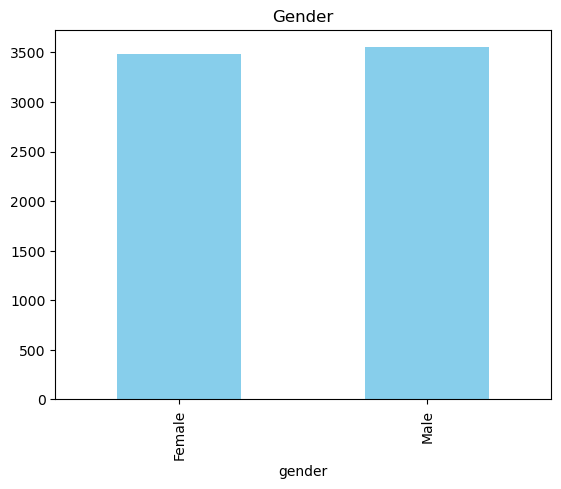

In [38]:
# Distribution of categorical data

df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', title = 'Gender', grid =True)

plt.show()

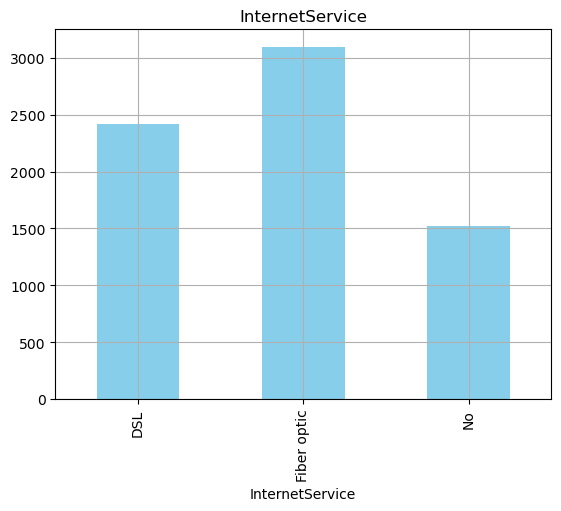

In [39]:
df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', title = 'InternetService', grid =True)

plt.show()

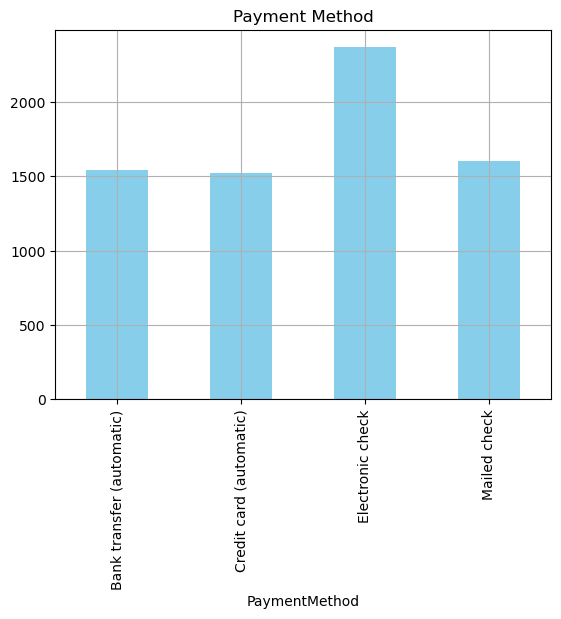

In [41]:
df.groupby('PaymentMethod').count()['customerID'].plot(
        kind = 'bar', color = 'skyblue', grid = True, title = 'Payment Method')

plt.show()

In [48]:
# one hot coding for categorical data

dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list (df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() <5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [50]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-2.202244,-3.373528,-1.071861,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1.324116,-2.727540,3.076022,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.509097,-2.783511,0.215473,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,1.604418,-3.024926,3.049882,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.509097,-2.511268,0.553529,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.122803,-2.168049,2.241868,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,0.888798,-2.279954,3.107231,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,0.100341,-3.376884,1.242050,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,1.129960,-2.117659,3.553555,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.924890,-2.741687,3.689023,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


## ANN with Keras

### Train and Test Sets

In [54]:
# train/test sets

target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x !=target_var]

### High level nueral networks

In [51]:
pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 761.8 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 876.9 kB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 177.8/177.8 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 781

In [52]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [55]:
# Build neural network model

# Layers are stacked linearly and similar to MLP model

from keras.models import Sequential
from keras.layers import Dense


In [56]:
# model building

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [57]:
# compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Split sample set into train and test sets

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features],
    sample_set[target_var],
    test_size=0.3
)

In [62]:
# fitting the model and training it

model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 [==============================] - 1s 2ms/step - loss: 0.5784 - accuracy: 0.7269
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7688
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7918
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7962
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8009
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.7997
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.7997
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8025
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8037
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8031
Epoch 11/50
50/50 [

## Model evaluations

In [63]:
# evaluate the nueral network performance

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [64]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

66/66 [==============================] - 0s 1ms/step


In [67]:
# Accuracy

print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

# Precision
print('In-Sample Accuracy: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-Sample Accuracy: %0.4f' % precision_score(y_test, out_sample_preds))

# Recall
print('In-Sample Accuracy: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-Sample Accuracy: %0.4f' % recall_score(y_test, out_sample_preds))



In-Sample Accuracy: 0.8119
Out-Sample Accuracy: 0.8095
In-Sample Accuracy: 0.6822
Out-Sample Accuracy: 0.6736
In-Sample Accuracy: 0.5547
Out-Sample Accuracy: 0.5298


### ROC and AUC

In [68]:
# Compute AUC

from sklearn.metrics import roc_curve, auc

In [70]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

66/66 [==============================] - 0s 1ms/step


In [72]:
in_sample_fpr, in_sample_tpr, in_sampler_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sampler_thresholds = roc_curve(y_test, out_sample_preds)

In [73]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8650
Out-Sample AUC: 0.8523


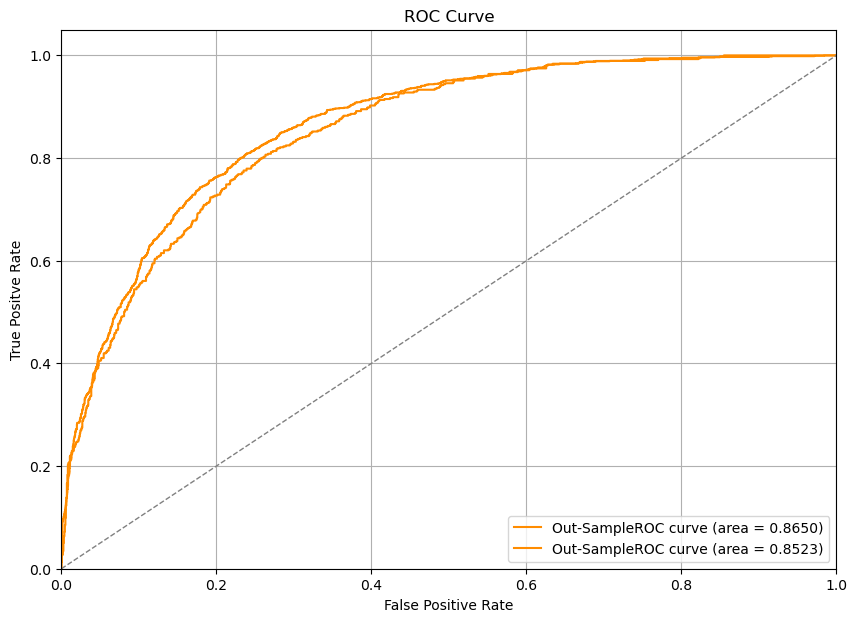

In [75]:
# visualise the ROC curve

plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-SampleROC curve (area = %0.4f)' % in_sample_roc_auc)

plt.plot(
    in_sample_fpr, in_sample_tpr, color='darkorange', label='Out-SampleROC curve (area = %0.4f)' % out_sample_roc_auc)

plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()